### This demonstration shows how NBHReviewCollector enables automated social media data collection and text analysis.

In [184]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
%matplotlib inline
import pandas as pd
import NBHReviewCollector.TweetCollector as tc
import NBHReviewCollector.TextProcessing as tp
import NBHReviewCollector.ExploratoryAnalysis as ea
import NBHReviewCollector.SortText as st
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_colwidth", 85)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mengcai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mengcai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

# Tweets

## Collecting tweets

In [57]:
help(tc.HistoricalTweets)

Help on function HistoricalTweets in module NBHReviewCollector.TweetCollector:

HistoricalTweets(search_term, key, secret, access_token, access_token_secret, from_date='201801010000', to_date='201912310000', filename='tweets.csv')
    Download tweets and write into a csv file.
    
    Input:
    search_term -- keywords for searching Twitter;
    key -- your Twitter API key;
    secret -- your API secret key;
    access_token -- your access token;
    access_token_secret -- your access token secret;
    from_date -- the start date (default "201801010000");
    to_date -- the end date (default "201912310000");
    filename -- name for the compiled csv file (default "tweets.csv").
    Output:
    A csv file of tweets downloaded in working directory.
    
    Reference:
    https://github.com/geduldig/TwitterAPI/tree/master/TwitterAPI
    https://developer.twitter.com/en/docs/tweets/search/overview



Note: HistoricalTweets function requires Twitter API tokens to use. Twitter API tokens can be obtained from [Twitter developer account](https://developer.twitter.com/).

## Import tweets

In [58]:
tweets = tp.ImportTweet("example_tweets.csv")
tweets.head()

time  lat  long  \
0 2019-12-30 18:13:05+00:00  NaN   NaN   
1 2019-12-29 18:00:01+00:00  NaN   NaN   
2 2019-12-29 13:20:08+00:00  NaN   NaN   
3 2019-12-27 07:46:34+00:00  NaN   NaN   
4 2019-12-23 17:08:46+00:00  NaN   NaN   

                                                                                  tweet  
0  We have bus service there but it is a very busy area for sure We may have a creat...  
1  I think the project overall will be an interesting experiment and a necessary one...  
2  Ok Self driving rvs that take people out of the city to very cheap rural areas ev...  
3  Sorry no AVs are not small buses Still susceptible to the same problems cars have...  
4  Had a very insightful time riding around in an Olli Autonomous shuttle at Thanks ...

In [59]:
# to avoid Las Vegas being processed as la vega
tweets["tweet"]=tweets["tweet"].str.replace("Las Vegas", "LasVegas")

## Most frequent words and phrases

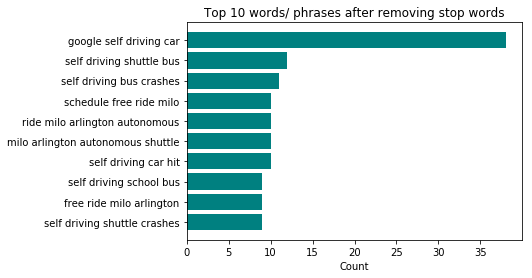

In [43]:
ea.PlotTopWords(tweets["tweet"],10,4,4)

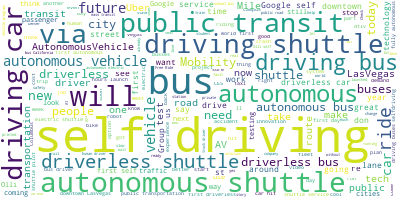

In [44]:
ea.PlotWordCloud(tweets["tweet"])

## Topic modeling

In [45]:
search_term=["autonomous", "self", "driving", "driverless", "bus", "shuttle", "public", "transit"]
other_term_to_remove=["car", "vehicle", "av", "ride", "via", "take", "get"]
remove_term=search_term + other_term_to_remove

In [46]:
t_lda= ea.Prepare(tweets["tweet"], remove_term)
t_topics, t_model, t_corpus, t_dic = ea.LDAtopic(t_lda, n_topics = 5, n_words = 5)
t_topics

[(0,
  '0.027*"first" + 0.023*"lasvegas" + 0.013*"crash" + 0.011*"day" + 0.010*"city"'),
 (1,
  '0.021*"google" + 0.015*"hit" + 0.015*"driver" + 0.008*"first" + 0.008*"street"'),
 (2,
  '0.012*"launch" + 0.010*"first" + 0.008*"make" + 0.007*"lasvegas" + 0.007*"mile"'),
 (3,
  '0.012*"future" + 0.010*"olli" + 0.010*"driver" + 0.010*"uber" + 0.009*"today"'),
 (4,
  '0.011*"new" + 0.008*"route" + 0.008*"first" + 0.008*"mile" + 0.008*"mobility"')]

In [11]:
tweets["lda_topic"]=ea.WhichTopic(tweets["tweet"],t_model, t_corpus)
tweets.head()

time  lat  long  \
0 2019-12-30 18:13:05+00:00  NaN   NaN   
1 2019-12-29 18:00:01+00:00  NaN   NaN   
2 2019-12-29 13:20:08+00:00  NaN   NaN   
3 2019-12-27 07:46:34+00:00  NaN   NaN   
4 2019-12-23 17:08:46+00:00  NaN   NaN   

                                                                                  tweet  \
0  We have bus service there but it is a very busy area for sure We may have a creat...   
1  I think the project overall will be an interesting experiment and a necessary one...   
2  Ok Self driving rvs that take people out of the city to very cheap rural areas ev...   
3  Sorry no AVs are not small buses Still susceptible to the same problems cars have...   
4  Had a very insightful time riding around in an Olli Autonomous shuttle at Thanks ...   

   lda_topic  
0          1  
1          4  
2          3  
3          0  
4          2

In [12]:
ea.PlotLDA(t_model, t_corpus, t_dic)

## Sentiment analysis

In [125]:
tweets["sentiment"]=ea.Sentiment(tweets["tweet"])
tweets.head()

time  lat  long  \
0 2019-12-30 18:13:05+00:00  NaN   NaN   
1 2019-12-29 18:00:01+00:00  NaN   NaN   
2 2019-12-29 13:20:08+00:00  NaN   NaN   
3 2019-12-27 07:46:34+00:00  NaN   NaN   
4 2019-12-23 17:08:46+00:00  NaN   NaN   

                                                                                  tweet  \
0  We have bus service there but it is a very busy area for sure We may have a creat...   
1  I think the project overall will be an interesting experiment and a necessary one...   
2  Ok Self driving rvs that take people out of the city to very cheap rural areas ev...   
3  Sorry no AVs are not small buses Still susceptible to the same problems cars have...   
4  Had a very insightful time riding around in an Olli Autonomous shuttle at Thanks ...   

  sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4  positive

In [14]:
ea.PlotSentiment(tweets["sentiment"])

---

# Survey data

## Import survey

In [210]:
# example_dr.csv and example_fr.csv are training data
# example_dr.csv contains survey responses from demand-response (e.g. Dial-a-ride) transit riders;
# example_fr.csv contains survey responses from fixed-route bus riders.
dr = tp.ImportComment("example_dr.csv", "feel")
fr = tp.ImportComment("example_fr.csv", "feel")
survey = pd.concat([dr,fr],ignore_index=True)[["feel", "codefeel"]]
feel_clean = []
for text in survey["feel"]:
    feel_clean.append(tp.TextCleaner(text))
survey["feel_clean"] = feel_clean

# example_newdata.csv is a file to be sorted 
survey_new = tp.ImportComment("example_newdata.csv", "feel")[["feel", "codefeel"]]

feel_clean_new = []
for text in survey_new["feel"]:
    feel_clean_new.append(tp.TextCleaner(text))
survey_new["feel_clean"] = feel_clean_new

## Sentiment analysis

In [212]:
survey_new["pred_senti"]=ea.Sentiment(survey_new["feel_clean"])

agree_senti = 0
for i in range(len(survey_new)):
    if survey_new["pred_senti"].iloc[i] == survey_new["codefeel"].iloc[i]:
        agree_senti = agree_senti + 1

print("The accuracy of TextBlob sentiment analysis is", round(agree_senti/len(survey_new),2))

The accuracy of TextBlob sentiment analysis is 0.59


## Machine learning approach

In [213]:
code = {"Negative": -1, "Neutral": 0, "Positive": 1}
survey = survey.replace({"codefeel": code})
survey_new = survey_new.replace({"codefeel": code})
survey_new = survey_new.replace({"pred_senti": code})

In [214]:
survey_new["pred_nn"]=st.SortText(survey_new["feel_clean"], survey["feel_clean"], survey["codefeel"])

In [217]:
agree_nn = 0
for i in range(len(survey_new)):
    if survey_new["pred_nn"].iloc[i] == survey_new["codefeel"].iloc[i]:
        agree_nn = agree_nn + 1

print("The accuracy of Netural Networks sentiment analysis is", round(agree_nn/len(survey_new),2))

The accuracy of Netural Networks sentiment analysis is 0.79
